<a href="https://colab.research.google.com/github/udeh-gideon/code-with-Gideon/blob/main/UNP_Capstone_Project2_by_Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project2:

**White wine dataset classification**

Description: Take the white wine dataset and predict the quality of wine depending on the inputs which are fixed acidity, volatile acidity, residual sugar etc.

Objective: **predict the quality of white wine**

Data source: https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
# Importing useful Python libraries for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression # logistic regression package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # decision tree package
from sklearn.ensemble import RandomForestClassifier # random forest package
from sklearn.neighbors import KNeighborsClassifier # K-Nearest-Neighbor package
from sklearn.svm import SVC # Support vector machine classifier package
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, balanced_accuracy_score

%matplotlib inline

Loading the csv file

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Wine Capstone Project/winequality-white.csv'
data = pd.read_csv(path)

Performing some data preprocessing tasks

In [ ]:
# Reading the first five rows of the csv file
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Getting general info of the csv file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Check for Nan values
data.columns.isna().sum()

0

In [ ]:
# Check for duplicate columns
data.columns.duplicated().sum()

0

Performing some EDA tasks

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Plotting Relevant Graphs

Text(0.5, 1.0, 'White wine pairlplot')

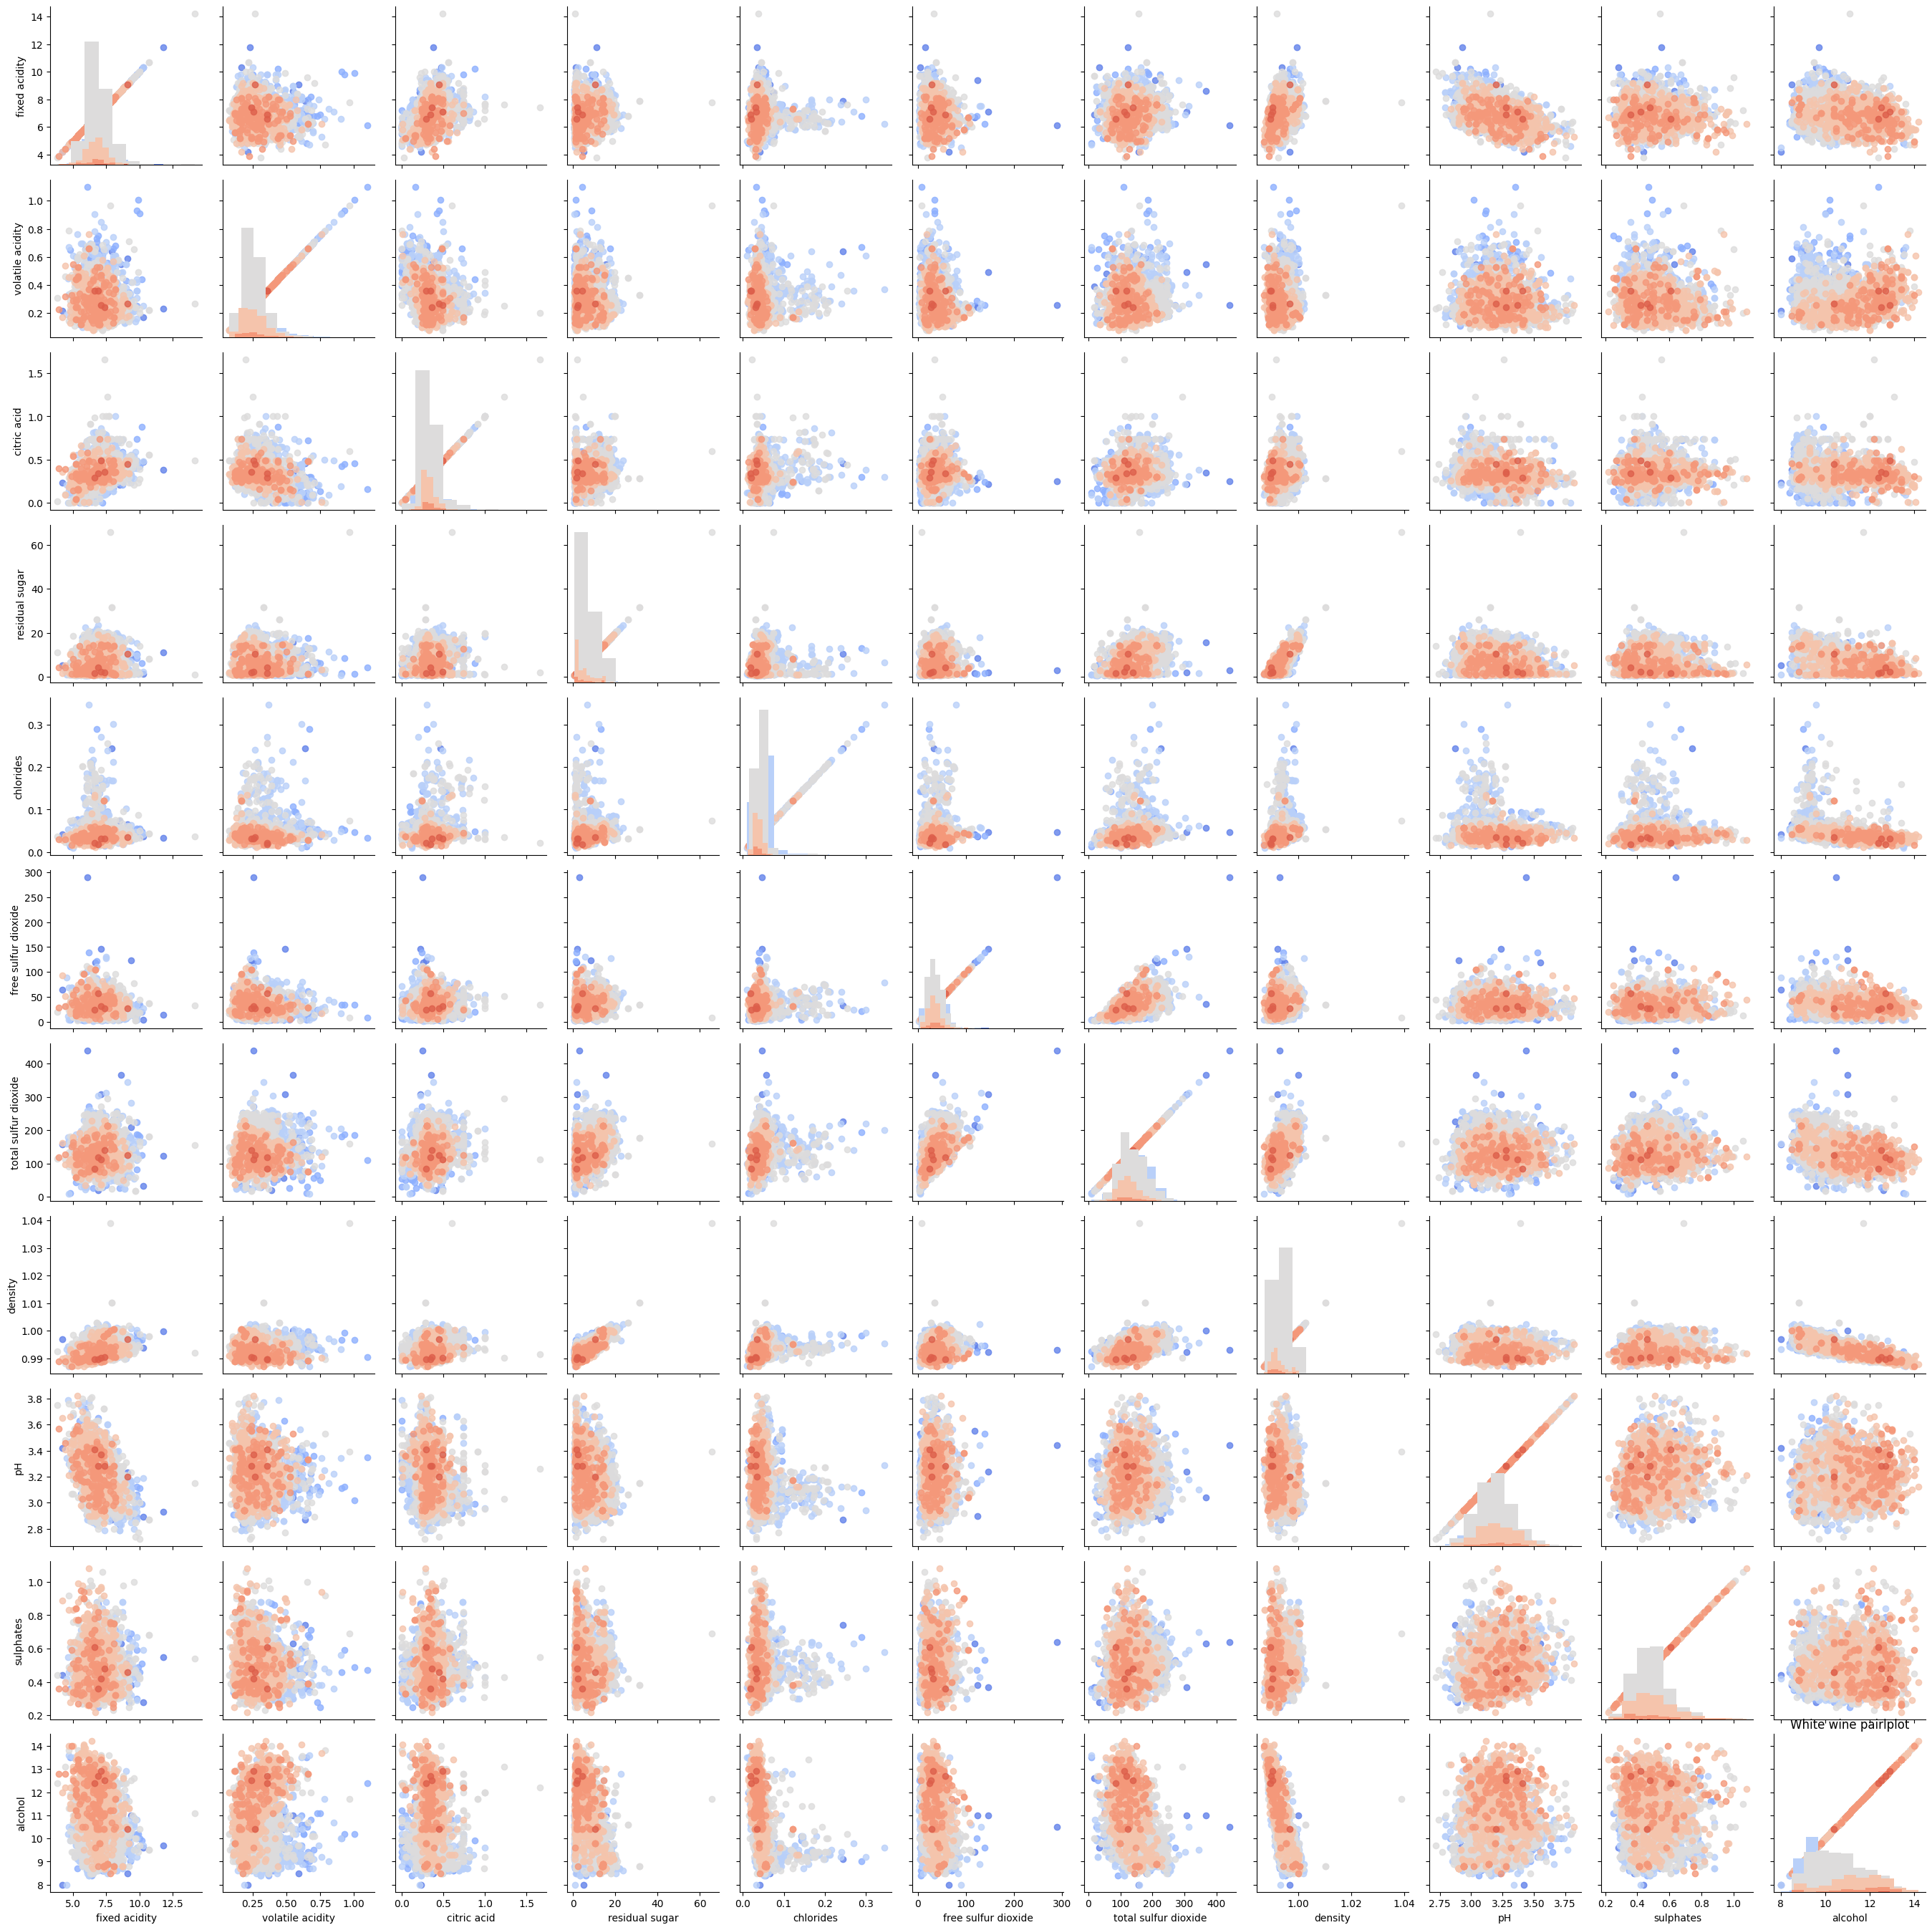

In [ ]:
# Some Scatter pairplots
fig = sns.PairGrid(data, hue='quality', palette='coolwarm')
fig.map(plt.scatter, alpha=0.8)
fig.map_diag(plt.hist)
plt.title('White wine pairlplot')

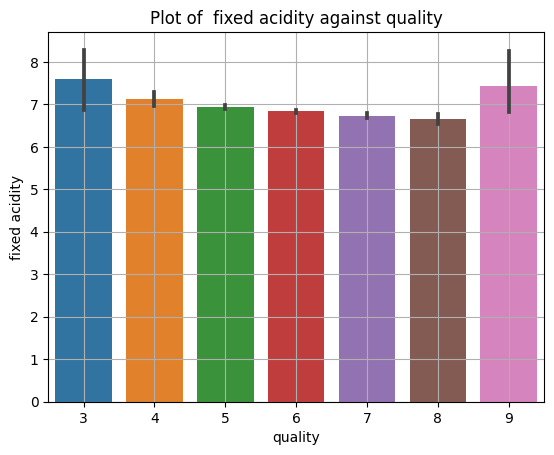

In [ ]:
# Bar plot for quality of white wine
fig = sns.barplot(x='quality', y='fixed acidity', data=data)
plt.title('Plot of  fixed acidity against quality')
plt.grid(True)

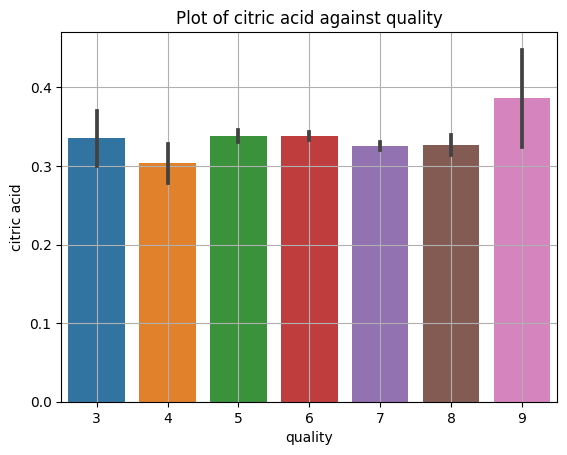

In [ ]:
# Bar plot for citric acid of white wine
fig = sns.barplot(x='quality', y='citric acid', data=data)
plt.title('Plot of citric acid against quality')
plt.grid(True)

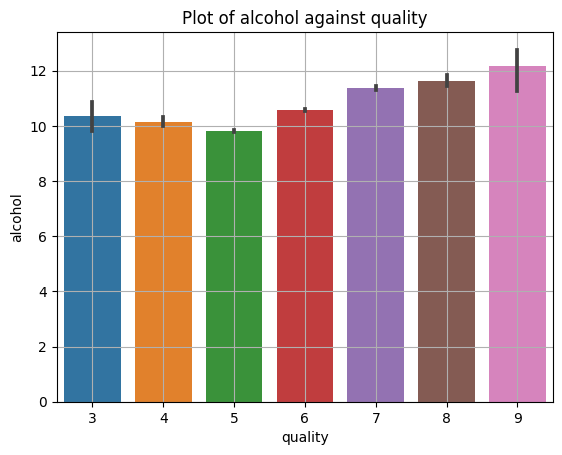

In [ ]:
# Bar plot for alcohol of white wine
fig = sns.barplot(x='quality', y='alcohol', data=data)
plt.title('Plot of alcohol against quality')
plt.grid(True)

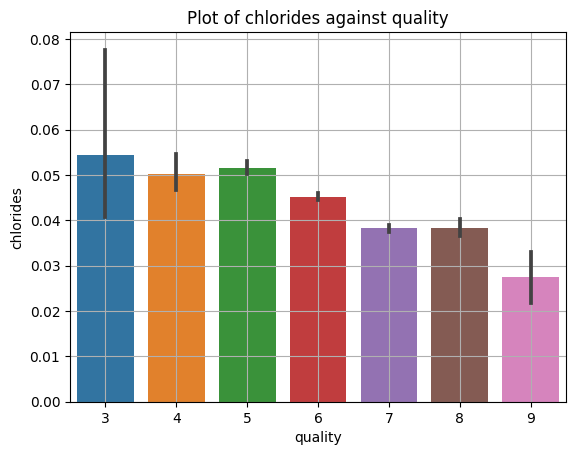

In [ ]:
# Bar ploy for chlorides of white wine
fig = sns.barplot(x='quality', y='chlorides', data=data)
plt.title('Plot of chlorides against quality')
plt.grid(True)

Text(0.5, 1.0, 'Heatmap for white wine')

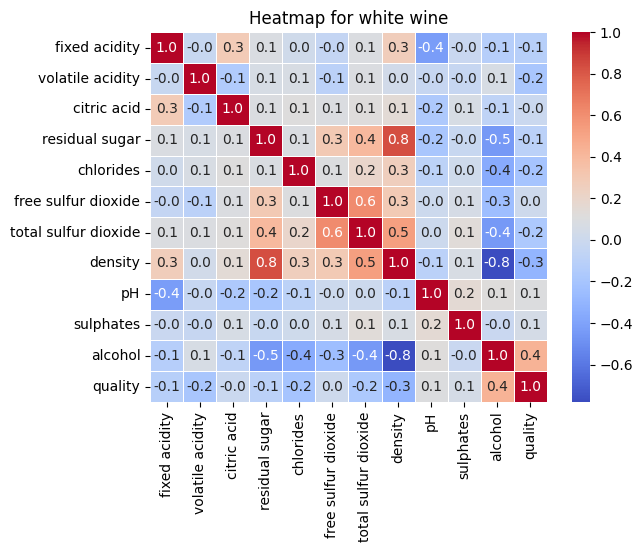

In [ ]:
# Heatmap for white wine
fig = sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt='.1f', cmap='coolwarm')
plt.title('Heatmap for white wine')

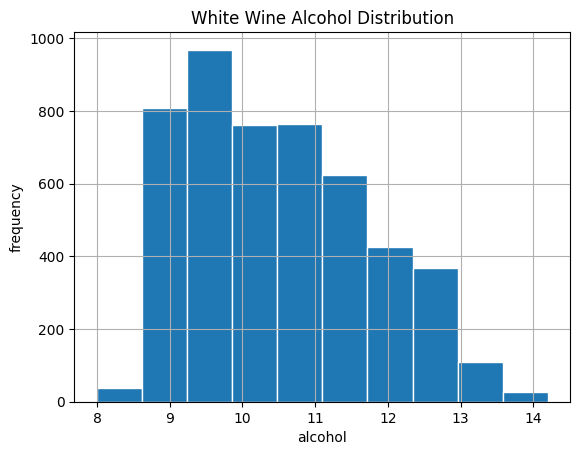

In [ ]:
# Plotting a histogram of White Wine Alcohol distribution
alcohol = data['alcohol']
plt.hist(alcohol, bins=10, edgecolor='white')

# Customize the plot
plt.xlabel('alcohol')
plt.ylabel('frequency')
plt.title('White Wine Alcohol Distribution')

# Show the plot
plt.grid(True)
plt.show()


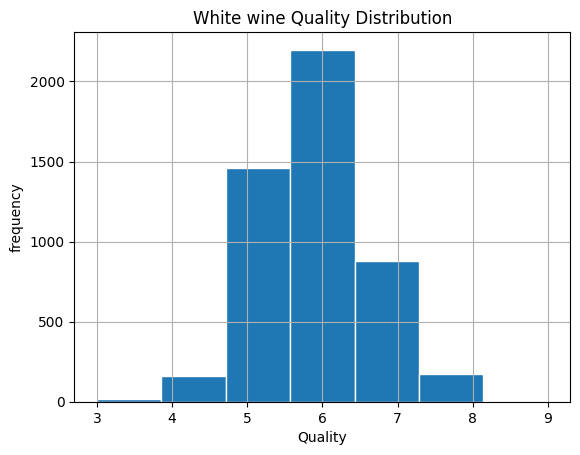

In [ ]:
# Plotting a histogram of White Wine Quality distribution
alcohol = data['quality']
plt.hist(alcohol, bins=7, edgecolor='white')

# Customize the plot
plt.xlabel('Quality')
plt.ylabel('frequency')
plt.title('White wine Quality Distribution')

# Show the plot
plt.grid(True)
plt.show()

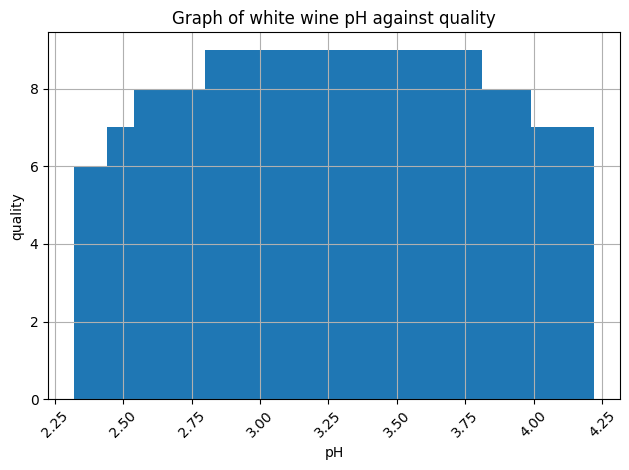

In [ ]:
# Bar Plot
quality = data['quality']
pH = data['pH']

# Create a Bar plot
plt.bar(pH, quality)

# Customize the plot
plt.xlabel('pH')
plt.ylabel('quality')
plt.title('Graph of white wine pH against quality')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

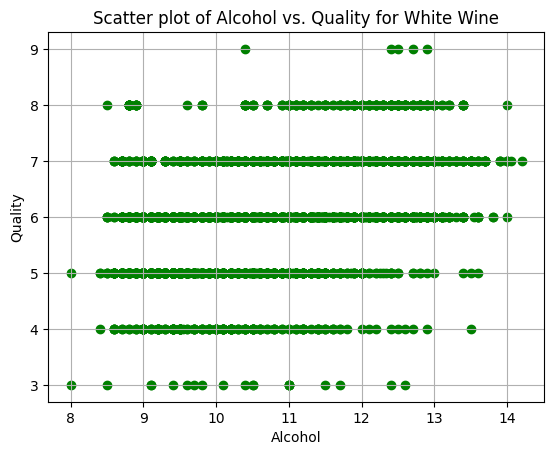

In [ ]:
# scatter plot of alcohol level against quality
alcohol = data['alcohol']
quality = data['quality']

# Create a scatter plot
plt.scatter(alcohol, quality, marker='o', color='g')

# Customize the plot
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Scatter plot of Alcohol vs. Quality for White Wine')

# Show the plot
plt.grid(True)
plt.show()


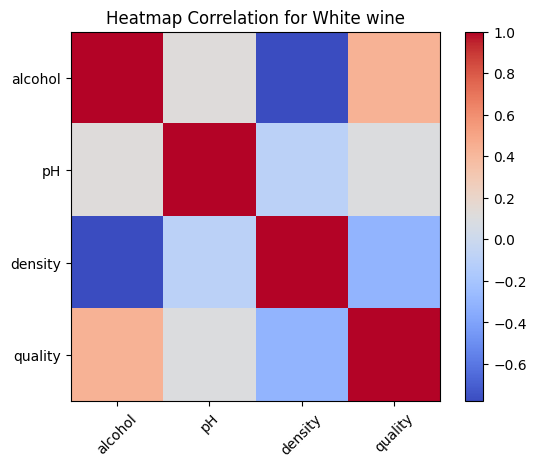

In [ ]:
# Heat Map Correlation
# Extract data for heatmap
heatmap_data = data[['alcohol', 'pH', 'density', 'quality']].corr()

# Create a heatmap
plt.imshow(heatmap_data, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Customize the plot
plt.xticks(range(len(heatmap_data)), heatmap_data.columns, rotation=45)
plt.yticks(range(len(heatmap_data)), heatmap_data.columns)
plt.title('Heatmap Correlation for White wine')

# Show the plot
plt.show()


Logistic Regression

In [ ]:
# Replacing values in the Quality column
data['quality'] = data.quality.replace((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), (0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1))
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [ ]:
# number of zeroes in the quality column
data['quality'].value_counts()[0]

1640

In [ ]:
# number of ones in the quality column
data['quality'].value_counts()[1]

3258

In [ ]:
# Splitting the dataset into features (x) and target variable (y)
x = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64

In [ ]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# Create a logistic regression model
logR = LogisticRegression()

In [ ]:
# Train the model using the training data
logR.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = logR.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
bal_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Accuracy: {:.3f}%".format(accuracy*100))
print('\nPrecision: {:.3f}%'.format(precision*100))
print('\nBalanced_accuracy: {:.3f}%'.format(bal_accuracy*100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 74.286%

Precision: 76.954%

Balanced_accuracy: 66.979%

Confusion Matrix:
[[147 174]
 [ 78 581]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.46      0.54       321
           1       0.77      0.88      0.82       659

    accuracy                           0.74       980
   macro avg       0.71      0.67      0.68       980
weighted avg       0.73      0.74      0.73       980



In [ ]:
# Testing the logistic regression model
fixed_acidity = float(input('Enter the fixed_acidity level: '))
volatile_acidity = float(input('Enter the volatility_acidity level: '))
citric_acid = float(input('Enter the citric_acid level: '))
residual_sugar = float(input('Enter the residual_sugar level: '))
chlorides = float(input('Enter the chlorides level: '))
free_sulfur_dioxide = float(input('Enter the free_sulfur_dioxide level: '))
total_sulfur_dioxide = float(input('Enter the total_sulfur_dioxide level: '))
density = float(input('Enter the density level: '))
pH = float(input('Enter the pH level: '))
sulphates = float(input('Enter the sulphate level: '))
alcohol = float(input('Enter the alcohol level: '))

# making predictions based on the data entered
quality_class = logR.predict(pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]], columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']))

print(f'\nQuality class = {quality_class}')

Enter the fixed_acidity level: 7
Enter the volatility_acidity level: 0.27
Enter the citric_acid level: 0.36
Enter the residual_sugar level: 20.7
Enter the chlorides level: 0.045
Enter the free_sulfur_dioxide level: 45
Enter the total_sulfur_dioxide level: 170
Enter the density level: 1.001
Enter the pH level: 3.00
Enter the sulphate level: 0.45
Enter the alcohol level: 8.8

Quality class = [1]


Text(0.5, 1.0, 'White wine classification')

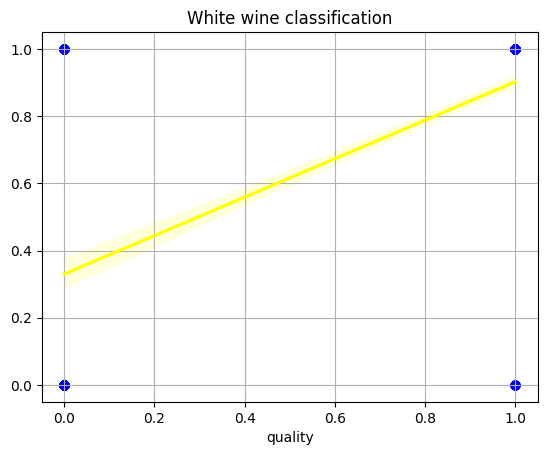

In [ ]:
# Visualizing the Test set results

sns.regplot(x = y_test, y = y_pred,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "yellow"})

# styling
plt.grid(True)
plt.title('White wine classification')

Implementing Decision Tree algorithm

In [ ]:
# creating a decision tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# train the classifier on the training data
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
bal_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Accuracy: {:.3f}%".format(accuracy*100))
print('\nPrecision: {:.3f}%'.format(precision*100))
print('\nBalanced_accuracy: {:.3f}%'.format(bal_accuracy*100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 79.592%

Precision: 84.511%

Balanced_accuracy: 76.597%

Confusion Matrix:
[[218 103]
 [ 97 562]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       321
           1       0.85      0.85      0.85       659

    accuracy                           0.80       980
   macro avg       0.77      0.77      0.77       980
weighted avg       0.79      0.80      0.80       980



In [ ]:
# Testing the decision tree model
fixed_acidity = float(input('Enter the fixed_acidity level: '))
volatile_acidity = float(input('Enter the volatility_acidity level: '))
citric_acid = float(input('Enter the citric_acid level: '))
residual_sugar = float(input('Enter the residual_sugar level: '))
chlorides = float(input('Enter the chlorides level: '))
free_sulfur_dioxide = float(input('Enter the free_sulfur_dioxide level: '))
total_sulfur_dioxide = float(input('Enter the total_sulfur_dioxide level: '))
density = float(input('Enter the density level: '))
pH = float(input('Enter the pH level: '))
sulphates = float(input('Enter the sulphate level: '))
alcohol = float(input('Enter the alcohol level: '))

# making predictions based on the data entered
quality_class = dt_classifier.predict(pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]], columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']))

print(f'\nQuality class = {quality_class}')

Enter the fixed_acidity level: 7
Enter the volatility_acidity level: 0.27
Enter the citric_acid level: 0.36
Enter the residual_sugar level: 20.7
Enter the chlorides level: 0.045
Enter the free_sulfur_dioxide level: 45
Enter the total_sulfur_dioxide level: 170
Enter the density level: 1.001
Enter the pH level: 3
Enter the sulphate level: 0.45
Enter the alcohol level: 8.8

Quality class = [1]


Text(0.5, 1.0, 'Red wine quality prediction')

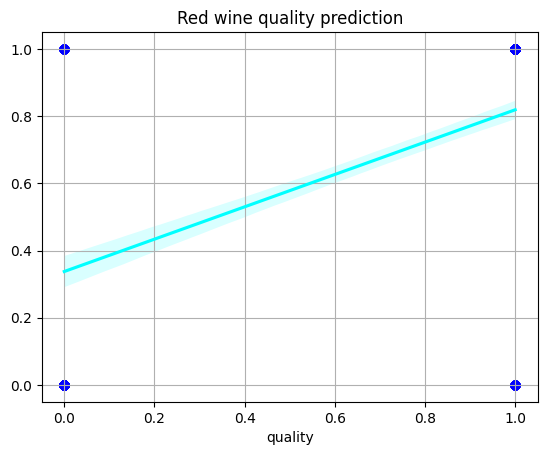

In [ ]:
# Visualizing the Test set results

sns.regplot(x = y_test, y = y_pred,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "cyan"})

# styling
plt.grid(True)
plt.title('White wine classification')

Random Forest Classification model

In [ ]:
# create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators= 100, random_state= 42)

# train the classifier on the training dataset
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
bal_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Accuracy: {:.3f}%".format(accuracy*100))
print('\nPrecision: {:.3f}%'.format(precision*100))
print('\nBalanced_accuracy: {:.3f}%'.format(bal_accuracy*100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 84.184%

Precision: 87.059%

Balanced_accuracy: 81.209%

Confusion Matrix:
[[233  88]
 [ 67 592]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       321
           1       0.87      0.90      0.88       659

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.82       980
weighted avg       0.84      0.84      0.84       980



In [ ]:
# Testing the random forest model
fixed_acidity = float(input('Enter the fixed_acidity level: '))
volatile_acidity = float(input('Enter the volatility_acidity level: '))
citric_acid = float(input('Enter the citric_acid level: '))
residual_sugar = float(input('Enter the residual_sugar level: '))
chlorides = float(input('Enter the chlorides level: '))
free_sulfur_dioxide = float(input('Enter the free_sulfur_dioxide level: '))
total_sulfur_dioxide = float(input('Enter the total_sulfur_dioxide level: '))
density = float(input('Enter the density level: '))
pH = float(input('Enter the pH level: '))
sulphates = float(input('Enter the sulphate level: '))
alcohol = float(input('Enter the alcohol level: '))

# making predictions based on the data entered
quality_class = rf_classifier.predict(pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]], columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']))

print(f'\nQuality class = {quality_class}')

Enter the fixed_acidity level: 7.0
Enter the volatility_acidity level: .27
Enter the citric_acid level: 0.36
Enter the residual_sugar level: 20.7
Enter the chlorides level: 0.045
Enter the free_sulfur_dioxide level: 45
Enter the total_sulfur_dioxide level: 170
Enter the density level: 1.001
Enter the pH level: 3
Enter the sulphate level: 0.45
Enter the alcohol level: 8.8

Quality class = [1]


Text(0.5, 1.0, 'White wine classification')

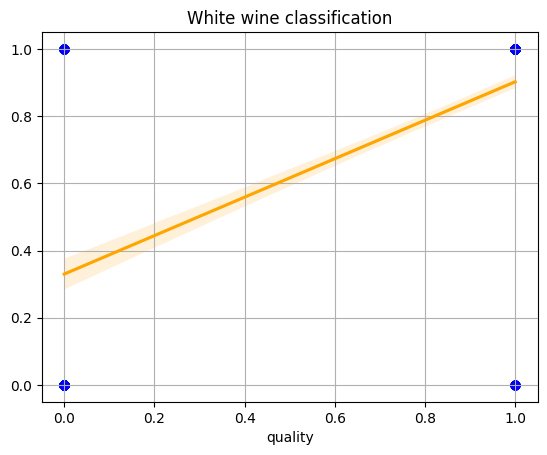

In [ ]:
# Visualizing the Test set results

sns.regplot(x = y_test, y = y_pred,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "orange"})

# styling
plt.grid(True)
plt.title('White wine classification')

Implementing K-Nearest-Neighbor model

In [ ]:
# Create a K-Nearest Neighbor classifier with n = 5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 5)

# Training the classifier on the training dataset
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# make predictions on the test data
y_pred = knn_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
bal_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Accuracy: {:.3f}%".format(accuracy*100))
print('\nPrecision: {:.3f}%'.format(precision*100))
print('\nBalanced_accuracy: {:.3f}%'.format(bal_accuracy*100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 71.122%

Precision: 76.257%

Balanced_accuracy: 64.947%

Confusion Matrix:
[[151 170]
 [113 546]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.47      0.52       321
           1       0.76      0.83      0.79       659

    accuracy                           0.71       980
   macro avg       0.67      0.65      0.66       980
weighted avg       0.70      0.71      0.70       980



In [ ]:
# Testing the KNN model
fixed_acidity = float(input('Enter the fixed_acidity level: '))
volatile_acidity = float(input('Enter the volatility_acidity level: '))
citric_acid = float(input('Enter the citric_acid level: '))
residual_sugar = float(input('Enter the residual_sugar level: '))
chlorides = float(input('Enter the chlorides level: '))
free_sulfur_dioxide = float(input('Enter the free_sulfur_dioxide level: '))
total_sulfur_dioxide = float(input('Enter the total_sulfur_dioxide level: '))
density = float(input('Enter the density level: '))
pH = float(input('Enter the pH level: '))
sulphates = float(input('Enter the sulphate level: '))
alcohol = float(input('Enter the alcohol level: '))

# making predictions based on the data entered
quality_class = knn_classifier.predict(pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]], columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']))

print(f'\nQuality class = {quality_class}')

Enter the fixed_acidity level: 7
Enter the volatility_acidity level: 0.27
Enter the citric_acid level: 0.36
Enter the residual_sugar level: 20.7
Enter the chlorides level: 0.045
Enter the free_sulfur_dioxide level: 45
Enter the total_sulfur_dioxide level: 170
Enter the density level: 1.001
Enter the pH level: 3
Enter the sulphate level: 0.45
Enter the alcohol level: 8.8

Quality class = [0]


Text(0.5, 1.0, 'White wine classification')

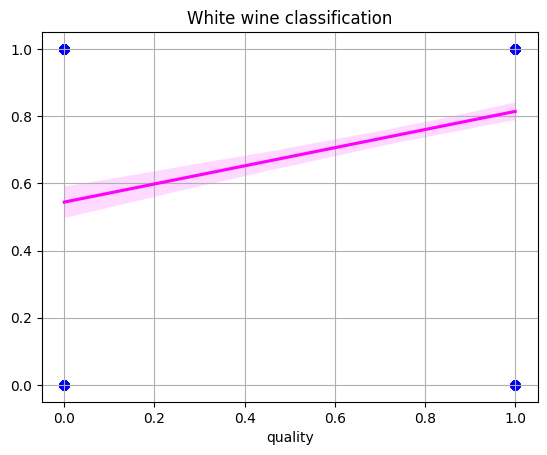

In [ ]:
# Visualizing the Test set results

sns.regplot(x = y_test, y = y_pred,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "magenta"})

# styling
plt.grid(True)
plt.title('White wine classification')

Implementing support vector machine (SVM) classifier model

In [ ]:
# creating svm classifier model
svm_classifier = SVC(kernel = 'linear', random_state = 42)

# training the model on the test data
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# making predictions
y_pred = svm_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred)
bal_accuracy = balanced_accuracy_score(y_test, y_pred)

print("Accuracy: {:.3f}%".format(accuracy*100))
print('\nPrecision: {:.3f}%'.format(precision*100))
print('\nBalanced_accuracy: {:.3f}%'.format(bal_accuracy*100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 74.286%

Precision: 76.812%

Balanced_accuracy: 66.819%

Confusion Matrix:
[[145 176]
 [ 76 583]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.45      0.54       321
           1       0.77      0.88      0.82       659

    accuracy                           0.74       980
   macro avg       0.71      0.67      0.68       980
weighted avg       0.73      0.74      0.73       980



In [ ]:
# Testing the SVM model
fixed_acidity = float(input('Enter the fixed_acidity level: '))
volatile_acidity = float(input('Enter the volatility_acidity level: '))
citric_acid = float(input('Enter the citric_acid level: '))
residual_sugar = float(input('Enter the residual_sugar level: '))
chlorides = float(input('Enter the chlorides level: '))
free_sulfur_dioxide = float(input('Enter the free_sulfur_dioxide level: '))
total_sulfur_dioxide = float(input('Enter the total_sulfur_dioxide level: '))
density = float(input('Enter the density level: '))
pH = float(input('Enter the pH level: '))
sulphates = float(input('Enter the sulphate level: '))
alcohol = float(input('Enter the alcohol level: '))

# making predictions based on the data entered
quality_class = svm_classifier.predict(pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]], columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']))

print(f'\nQuality class = {quality_class}')

Enter the fixed_acidity level: 7
Enter the volatility_acidity level: 0.27
Enter the citric_acid level: 0.36
Enter the residual_sugar level: 20.7
Enter the chlorides level: 0.045
Enter the free_sulfur_dioxide level: 45
Enter the total_sulfur_dioxide level: 170
Enter the density level: 1.001
Enter the pH level: 3
Enter the sulphate level: 0.45
Enter the alcohol level: 8.8

Quality class = [1]


Text(0.5, 1.0, 'White wine classification')

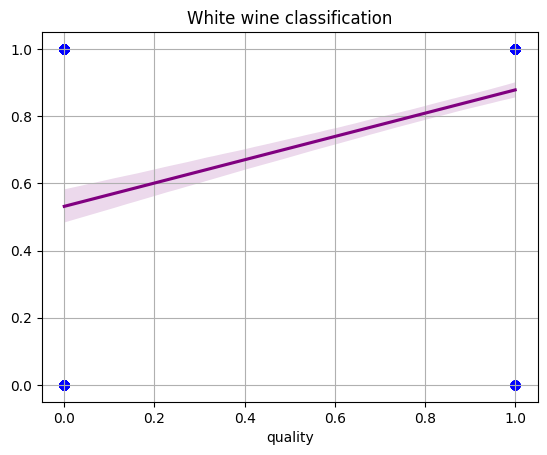

In [ ]:
# Visualizing the Test set results

sns.regplot(x = y_test, y = y_pred,
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "purple"})

# styling
plt.grid(True)
plt.title('White wine classification')